![](https://upload.wikimedia.org/wikipedia/commons/9/9c/Dunder_Mifflin%2C_Inc.svg)
# Dunder Mifflin Paper Company
Scranton, PA

---

**What would I like to know?**
* How often does each character speak per season? Number of lines? Number of words?
* Does the balance of who is speaking most often change over the course of the show? At the beginning, is it primarily central figures?
* Who uses the most words? Who uses the most unique words? Who uses the longest words? Who uses the most stopwords?
* Do men speak more often than women? Does this change over the course of the show?
* What is the breakdown between main characters, recurring characters, and one-off characters in terms of words or lines spoken? Does this change over the course of the show?
* Which episodes had the most words or lines? Which episodes had the least?

---

In [77]:
# import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,nltk
%matplotlib inline

In [178]:
# load the dataframe and drop unused columns
df = pd.read_csv('the_office-all_episodes.csv', dtype=str)
df.drop(columns=['word_count','character_type'], inplace=True)

In [3]:
# print df columns
print(' | '.join([col for col in df.columns]))

season | episode | character | line


In [180]:
# create column for raw word count
df['raw_word_count'] = df['line'].apply(lambda x: len(str(x).split()))

In [5]:
# get number of episodes in the show
df['season_episode'] = df['season'] + '-' + df['episode']
total_episodes = df['season_episode'].unique().size

print(f"There are {total_episodes} episodes in The Office.")

There are 186 episodes in The Office.


In [6]:
# get number of episodes in each season
episodes_per_season = df[['season','episode']].drop_duplicates()
episodes_per_season.groupby('season').count().rename(columns={'episode':'episodes'})

,episodes
season,
1,6
2,22
3,23
4,14
5,26
6,24
7,24
8,24
9,23


In [8]:
# identify characters as 'main', 'recurring', or 'one time' based on number of episodes they appear in

episodes_per_character = df[['character','season','episode']].drop_duplicates()
episodes_per_character = episodes_per_character.groupby('character')['character'].count().sort_values(ascending=False).to_frame(name="episode_count").reset_index()

def character_type_by_episodes(episode_count):
    if episode_count >= total_episodes/2:
        character_type = 'main'
    elif episode_count >= 10:
        character_type = 'recurring'
    else:
        character_type = 'infrequent'
    return character_type

episodes_per_character['character_type'] = episodes_per_character['episode_count'].apply(lambda x: character_type_by_episodes(x))

if 'character_type' not in df.columns:
    df = df.merge(episodes_per_character[['character','character_type']], on='character')
df

,season,episode,character,line,raw_word_count,season_episode,character_type
0,1,1,Michael,All right Jim. Your quarterlies look very good...,14,1-1,main
1,1,1,Michael,So you've come to the master for guidance? Is ...,14,1-1,main
2,1,1,Michael,"All right. Well, let me show you how it's done.",10,1-1,main
3,1,1,Michael,"Yes, I'd like to speak to your office manager,...",81,1-1,main
4,1,1,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...",59,1-1,main
...,...,...,...,...,...,...,...
57346,9,23,Joan,"So my question is, um, do... don't you hate he...",28,9-23,infrequent
57347,9,23,Joan,Erin...,1,9-23,infrequent
57348,9,23,Joan,"Um...Oh, Erin..",2,9-23,infrequent
57349,9,23,Minister,"As it is traditional to the Schrutes, the love...",31,9-23,infrequent


In [134]:
# get the number of lines spoken by each character for each episode in season 1

main_chars_s1_df = df[(df['character_type']=='main') & (main_chars_df['season']=='1')]
lines_by_character_by_episode_s1 = main_chars_s1_df.groupby(['episode','character'])['line'].count().to_frame(name='lines_spoken').sort_values(by=['episode','lines_spoken'], ascending=[True,False]).reset_index()

lines_by_character_by_episode_s1

,episode,character,lines_spoken
0,1,Michael,99
1,1,Pam,45
2,1,Jim,37
3,1,Dwight,33
4,1,Ryan,10
...,...,...,...
60,6,Kevin,7
61,6,Angela,3
62,6,Kelly,3
63,6,Stanley,3


In [135]:
#get total lines for each episode

total_lines_by_episode = df.groupby(['season','episode'])['line'].count().to_frame(name='total_lines')
total_lines_by_episode

total_lines
season episode             
1      1                268
       2                271
       3                325
       4                361
       5                311
...                     ...
9      5                238
       6                236
       7                253
       8                280
       9                264

[186 rows x 1 columns]

In [137]:
# get the number of lines spoken by each character in each episode and the percentage of their line to the total

lines_by_character_by_episode = df.groupby(['season','episode','character'])['line'].count().to_frame(name='lines_spoken').sort_values(by=['season','episode','lines_spoken'], ascending=[True,True,False]).reset_index()
lines_by_character_by_episode['pct_total_lines_spoken'] = lines_by_character_by_episode['lines_spoken']/lines_by_character_by_episode.groupby(['season','episode'])['lines_spoken'].transform('sum')
lines_by_character_by_episode

,season,episode,character,lines_spoken,pct_total_lines_spoken
0,1,1,Michael,99,0.369403
1,1,1,Pam,45,0.167910
2,1,1,Jim,37,0.138060
3,1,1,Dwight,33,0.123134
4,1,1,Jan,12,0.044776
...,...,...,...,...,...
3871,9,9,Phyllis,10,0.037879
3872,9,9,Toby,8,0.030303
3873,9,9,Meredith,5,0.018939
3874,9,9,Oscar,5,0.018939


In [150]:
# get the total and average word counts per episode by character
word_counts_per_episode = df.groupby(['season','episode','character'])['raw_word_count'].agg(['sum','mean']).sort_values(by=['season','episode','sum'],ascending=[True,True,False])
word_counts_per_episode

sum       mean
season episode character                 
1      1       Michael    1924  19.434343
               Dwight      401  12.151515
               Jim         382  10.324324
               Pam         302   6.565217
               Jan         139  11.583333
...                        ...        ...
9      9       Darryl       61   4.066667
               Nellie       57   4.750000
               Angela       53   5.300000
               Meredith     42   8.400000
               Stanley      24   4.800000

[3876 rows x 2 columns]

In [181]:
# get average length of words in line
word_df = df
word_df['avg_word_length'] = word_df['line'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
word_df
df

,season,episode,character,line,avg_word_length,raw_word_count
0,1,1,Michael,All right Jim. Your quarterlies look very good...,4.642857,14
1,1,1,Jim,"Oh, I told you. I couldn't close it. So...",3.777778,9
2,1,1,Michael,So you've come to the master for guidance? Is ...,5.000000,14
3,1,1,Jim,"Actually, you called me in here, but yeah.",4.375000,8
4,1,1,Michael,"All right. Well, let me show you how it's done.",3.800000,10
...,...,...,...,...,...,...
57346,9,23,Oscar,Why do you say that?,3.200000,5
57347,9,23,Kevin,It's just that I'm so emotional.,4.500000,6
57348,9,23,Oscar,"Yeah, but you're not gay. You're not gay.",4.250000,8
57349,9,23,Kevin,"No, but maybe the reason...",4.600000,5


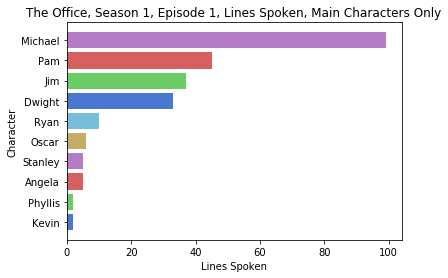

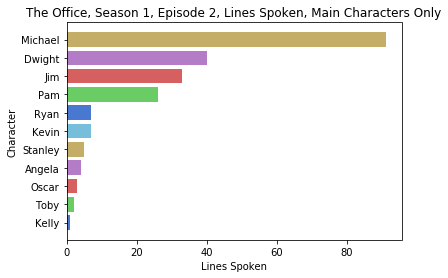

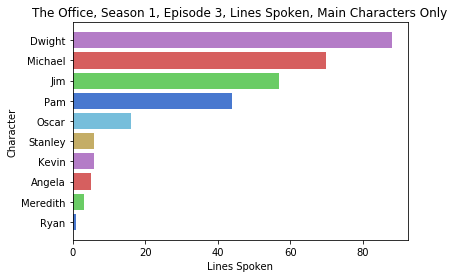

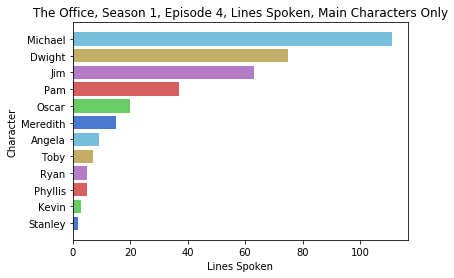

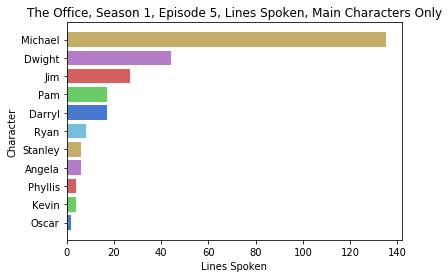

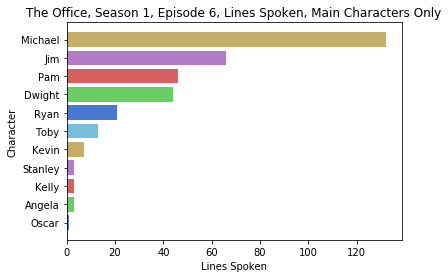

In [138]:
# plot lines spoken by character per episode
for episode in lines_by_character_by_episode_s1['episode'].unique():
    characters = lines_by_character_by_episode_s1[lines_by_character_by_episode_s1['episode']==episode]['character'].unique()
    temp_df = lines_by_character_by_episode_s1[lines_by_character_by_episode_s1['episode']==episode].sort_values(by='lines_spoken')
    plt.barh('character','lines_spoken',data=temp_df,color=sns.color_palette("muted"))
    plt.title(f'The Office, Season 1, Episode {episode}, Lines Spoken, Main Characters Only')
    plt.ylabel('Character')
    plt.xlabel('Lines Spoken')
    plt.show()